In [1]:
import os
os.chdir('/Users/obadaessa/Desktop/Internship/Data Sets')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection       import train_test_split
from sklearn.metrics               import confusion_matrix
from sklearn.metrics               import accuracy_score, recall_score, roc_auc_score, confusion_matrix
from sklearn.preprocessing         import StandardScaler
from sklearn.model_selection       import cross_val_score, cross_val_predict
from sklearn.metrics               import precision_score
from sklearn                       import metrics
from sklearn.tree                  import DecisionTreeClassifier
from sklearn.ensemble              import RandomForestRegressor
from scipy import stats

import plotly.express as px
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode
import sklearn.metrics as mx
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)

/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.linear_model.logistic module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.linear_model. Anything that cannot be imported from sklearn.linear_model is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data1 = pd.read_csv('Employee-Attrition.csv')

data1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
data1.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [4]:
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
IQR = Q3-Q1
IQR

Age                            13.00
DailyRate                     692.00
DistanceFromHome               12.00
Education                       2.00
EmployeeCount                   0.00
EmployeeNumber               1064.50
EnvironmentSatisfaction         2.00
HourlyRate                     35.75
JobInvolvement                  1.00
JobLevel                        2.00
JobSatisfaction                 2.00
MonthlyIncome                5468.00
MonthlyRate                 12414.50
NumCompaniesWorked              3.00
PercentSalaryHike               6.00
PerformanceRating               0.00
RelationshipSatisfaction        2.00
StandardHours                   0.00
StockOptionLevel                1.00
TotalWorkingYears               9.00
TrainingTimesLastYear           1.00
WorkLifeBalance                 1.00
YearsAtCompany                  6.00
YearsInCurrentRole              5.00
YearsSinceLastPromotion         3.00
YearsWithCurrManager            5.00
dtype: float64

In [5]:
data1 = data1[~((data1<(Q1 -1.5*IQR)) | (data1 >(Q3+1.5*IQR))).any(axis=1)]
data1

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7
11,29,No,Travel_Rarely,153,Research & Development,15,2,Life Sciences,1,15,...,4,80,0,10,3,3,9,5,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1463,31,No,Non-Travel,325,Research & Development,5,3,Medical,1,2057,...,2,80,0,10,2,3,9,4,1,7
1464,26,No,Travel_Rarely,1167,Sales,5,3,Other,1,2060,...,4,80,0,5,2,3,4,2,0,0
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [6]:
data1['Attrition'].replace(['Yes', 'No'], ['1', '0'], inplace=True)
data1['Attrition'] = data1['Attrition'].astype('int')

data1['MaritalStatus'].replace(['Married', 'Divorced', 'Single'], 
                               ['2', '1', '0'], inplace=True)
data1['MaritalStatus'] = data1['MaritalStatus'].astype('int')

data1['OverTime'].replace(['Yes', 'No'], 
                          ['1', '0'], inplace=True)
data1['OverTime'] = data1['OverTime'].astype('int')

In [7]:
data1.corrwith(data1['Attrition'], axis=0)

Age                        -0.171781
Attrition                   1.000000
DailyRate                  -0.057675
DistanceFromHome            0.075613
Education                  -0.045979
EmployeeCount                    NaN
EmployeeNumber              0.002388
EnvironmentSatisfaction    -0.116592
HourlyRate                  0.011265
JobInvolvement             -0.133460
JobLevel                   -0.168421
JobSatisfaction            -0.076020
MaritalStatus              -0.154203
MonthlyIncome              -0.160598
MonthlyRate                 0.045583
NumCompaniesWorked          0.023896
OverTime                    0.222000
PercentSalaryHike          -0.065935
PerformanceRating                NaN
RelationshipSatisfaction   -0.076040
StandardHours                    NaN
StockOptionLevel           -0.198342
TotalWorkingYears          -0.195474
TrainingTimesLastYear       0.035248
WorkLifeBalance            -0.078955
YearsAtCompany             -0.190790
YearsInCurrentRole         -0.171889
Y

In [8]:
data1 = data1.loc[:, ['Age', 'JobLevel', 'MaritalStatus', 'Attrition',
                  'OverTime', 'StockOptionLevel', 'YearsAtCompany']]

In [9]:
data1.describe()

,Age,JobLevel,MaritalStatus,Attrition,OverTime,StockOptionLevel,YearsAtCompany
count,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000,779.000000
mean,35.332478,1.750963,1.107831,0.177150,0.290116,0.666239,5.391528
std,8.556548,0.751765,0.891939,0.382041,0.454107,0.694471,3.650824
min,18.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,34.000000,2.000000,1.000000,0.000000,0.000000,1.000000,5.000000
75%,40.000000,2.000000,2.000000,0.000000,1.000000,1.000000,8.000000
max,60.000000,4.000000,2.000000,1.000000,1.000000,2.000000,18.000000


In [10]:
x = data1.loc[:, ['Age', 'JobLevel', 'MaritalStatus', 
                  'OverTime', 'StockOptionLevel', 'YearsAtCompany']]

y = data1.loc[:, 'Attrition']

In [11]:
x

,Age,JobLevel,MaritalStatus,OverTime,StockOptionLevel,YearsAtCompany
2,37,1,0,1,0,0
3,33,1,2,1,0,8
5,32,1,0,0,0,7
9,36,2,2,0,2,7
11,29,2,0,1,0,9
...,...,...,...,...,...,...
1463,31,2,0,0,0,9
1464,26,1,0,0,0,4
1465,36,2,2,0,1,5
1468,49,2,2,0,0,9


In [12]:
y

2       1
3       0
5       0
9       0
11      0
       ..
1463    0
1464    0
1465    0
1468    0
1469    0
Name: Attrition, Length: 779, dtype: int64

In [13]:
data1.pivot(columns='Attrition', 
            values='Age').iplot(kind='box', 
                                      xTitle='Attrition',
                                      yTitle='Age', 
                                      title='Attrition by Age')

In [14]:
data1.pivot(columns='Attrition', 
            values='OverTime').iplot(kind='box', 
                                      xTitle='Attrition',
                                      yTitle='OverTime', 
                                      title='Attrition by Over Time')

In [15]:
data1.pivot(columns='Attrition', 
            values='YearsAtCompany').iplot(kind='box', 
                                      xTitle='Attrition',
                                      yTitle='YearsAtCompany', 
                                      title='Attrition by Years At Company')

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2)

In [17]:
xtest

,Age,JobLevel,MaritalStatus,OverTime,StockOptionLevel,YearsAtCompany
761,36,2,1,0,1,1
802,33,2,2,0,1,3
1037,45,3,2,1,2,3
825,29,2,2,1,1,10
504,45,2,2,0,2,1
...,...,...,...,...,...,...
207,36,1,0,0,0,8
794,34,2,0,0,0,6
333,43,3,2,0,1,1
1014,31,4,0,0,0,3


In [18]:
xtrain.count

<bound method DataFrame.count of       Age  JobLevel  MaritalStatus  OverTime  StockOptionLevel  YearsAtCompany
1418   38         2              2         0                 1               8
1241   32         3              2         0                 1               4
1355   36         2              2         0                 2               4
757    34         2              1         0                 1              15
1029   40         2              1         0                 2               8
...   ...       ...            ...       ...               ...             ...
998    26         1              0         0                 0               4
670    27         1              0         0                 0               1
459    41         2              0         1                 0               8
1274   31         2              2         0                 2              12
463    26         1              0         1                 0               1

[623 rows x 6 colu

In [19]:
ytest.count

<bound method Series.count of 761     1
802     0
1037    0
825     0
504     1
       ..
207     0
794     0
333     0
1014    0
606     0
Name: Attrition, Length: 156, dtype: int64>

In [20]:
ytrain.count

<bound method Series.count of 1418    0
1241    0
1355    0
757     0
1029    0
       ..
998     0
670     0
459     0
1274    0
463     1
Name: Attrition, Length: 623, dtype: int64>

# Logistic Regression

In [21]:
cls = LogisticRegression(random_state=0)
lrcls = cls.fit(xtrain, ytrain)

In [22]:
scaler = StandardScaler()

xtrainstd = scaler.fit_transform(xtrain)
xteststd = scaler.transform(xtest)

lracc = cross_val_score(lrcls, xtrainstd, ytrain, cv=3, scoring='accuracy', n_jobs=-1)
lrproba = cross_val_predict(lrcls, xtrainstd, ytrain, cv=3, method='predict_proba')
lrscores = lrproba[:, 1]

In [23]:
lracc

array([0.84615385, 0.84134615, 0.83091787])

In [24]:
lrytrain = lrcls.predict(xtrain)

In [25]:
lracctrain = accuracy_score(ytrain, lrytrain)
lracctrain

0.8443017656500803

In [26]:
def roccurve(title, ytrain, scores, label=None):
    
    fpr, tpr, th = metrics.roc_curve(ytrain, scores)
    print('AUC Score ({}): {:.2f}'.format(title, roc_auc_score(ytrain, scores)))
    plt.figure(figsize=(16,8))
    plt.plot(fpr, tpr, linewidth=2, label=label, color='r')
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC Curve: {}'.format(title), fontsize=16)
    plt.show()

AUC Score (Employee Attrition): 0.76


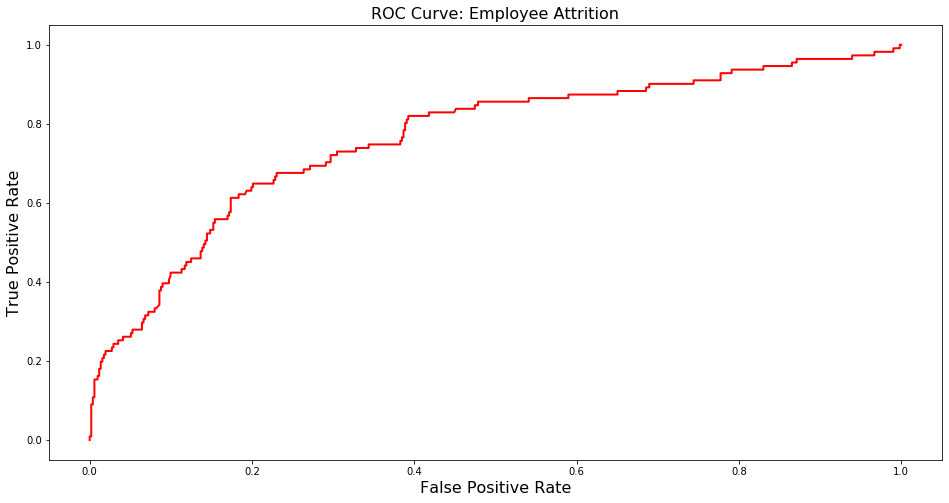

In [27]:
roccurve('Employee Attrition', ytrain, lrscores)

In [28]:
lrytest = lrcls.predict(xtest)

In [29]:
print('Precision Scores:')
lrprecisiontest = precision_score(ytest, lrytest, average='weighted')
print('Test: ', lrprecisiontest)
lrprecisiontrain = precision_score(ytrain, lrytrain, average='weighted')
print('Train: ', lrprecisiontrain)

Precision Scores:
Test:  0.7993377483443709
Train:  0.8275190423229123


In [30]:
print('Accuracy score: %f' %(accuracy_score(ytest, lrytest)*100))
print('Recall score: %f' %(recall_score(ytest, lrytest)*100))
print('ROC score: %f' %(roc_auc_score(ytest, lrytest)*100))
print(confusion_matrix(ytest, lrytest))

Accuracy score: 83.333333
Recall score: 11.111111
ROC score: 54.780362
[[127   2]
 [ 24   3]]


# Decision Tree Classifier

In [31]:
dtcclf = DecisionTreeClassifier()
dtcclf.fit(xtrain, ytrain)

dtcytest = dtcclf.predict(xtest)

dtcytrain = dtcclf.predict(xtrain)

In [32]:
print('\tConfusion Matrix:\n')
dtccmtest = confusion_matrix(ytest, dtcytest)
print('Test:\n', dtccmtest)
dtccmtrain = confusion_matrix(ytrain, dtcytrain)
print('Train:\n', dtccmtrain)

print('\n\tAccuracy:\n')
dtcacctest = accuracy_score(ytest, dtcytest)
print('Test: ', dtcacctest)
dtcacctrain = accuracy_score(ytrain, dtcytrain)
print('Train: ', dtcacctrain)

print('\n\tPrecision:\n')
dtcprectest = precision_score(ytest, dtcytest, average='weighted')
print('Test: ', dtcprectest)
dtcrectrain = precision_score(ytrain, dtcytrain, average='weighted')
print('Train: ', dtcrectrain)

	Confusion Matrix:

Test:
 [[105  24]
 [ 18   9]]
Train:
 [[511   1]
 [ 10 101]]

	Accuracy:

Test:  0.7307692307692307
Train:  0.9823434991974318

	Precision:

Test:  0.7531127409176189
Train:  0.9824791483588626


# Random Forest

In [33]:
regressor = RandomForestRegressor(n_estimators=100, random_state=0)

In [34]:
x = (data1.loc[:, 'Age'].values).reshape(-1,1) # Age
y = (data1.loc[:, 'Attrition'].values) # Attrition

In [35]:
regressor.fit(x, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

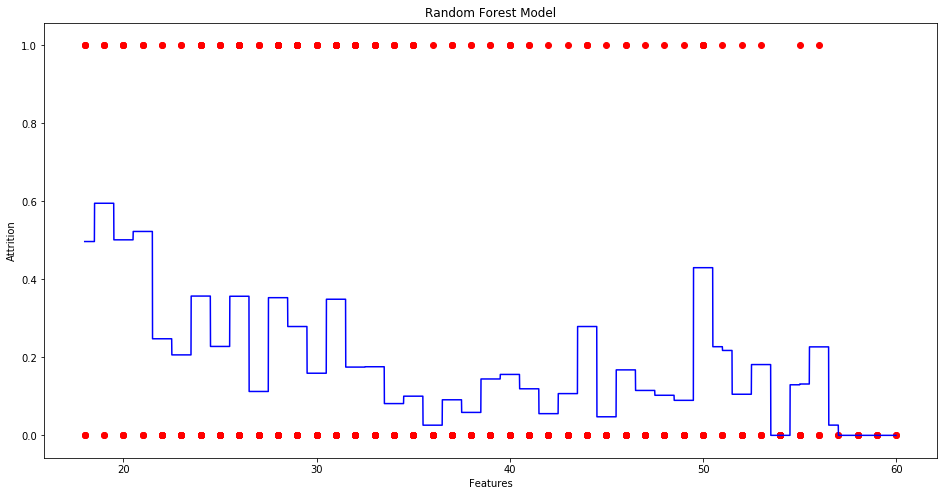

In [38]:
xgrid = np.arange(min(x), max(x), 0.01)
xgrid = xgrid.reshape(len(xgrid), 1)
plt.figure(figsize=(16,8))
plt.scatter(x, y, color='red')
plt.plot(xgrid, regressor.predict(xgrid), color='blue')
plt.title('Random Forest Model')
plt.xlabel('Features')
plt.ylabel('Attrition')
plt.show()